In [1]:
import sys
sys.path.append('C:/Users/Fabian/gempy')
#sys.path.insert(1,'/home/fabian/gempy')
import gempy as gp

C:/Users/Fabian/gempy\gempy\plotting\visualization.py:31: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')
C:/Users/Fabian/gempy\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
C:/Users/Fabian/gempy\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')


In [2]:
%matplotlib inline
import pymc
import numpy as np
import math

from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

#import vtk
#import evtk

from scipy.interpolate import griddata

In [3]:
import gempy.utils.spill_analysis as sp
import gempy.utils.fault_analysis as fa
import gempy.utils.decision_making as dm

In [4]:
from gempy import posterior_analysis_elisa as pa

In [5]:
#db0 = pymc.database.hdf5.load('trapmodel_lithSIMPLEMCsff4Test2r50[ 40  60  80 100]_offset150_10000iterations.hdf5')
#dbname0 = './MCm1/trapmodel_lithSIMPLEMC[ 40  60  80 100]_offset150_1000iterations2.hdf5'
#dbname0 = 'trapmodel_lithSIMPLEMCsff4Test2r50[ 40  60  80 100]_offset150_10000iterations.hdf5'
#db1 = pymc.database.hdf5.load('./input_data/Traces/post_model_150_30-350_30-250_20_1000iter50burn.hdf5')

In [6]:
prior = './Model_Prior/SIMPLEMCsff5finalR50[ 40  60  80 100]_offset150_10000iterations.hdf5'
s2a_thickseal = "./Model_SealL300-30_/AdaptiveM_MCMC_SEAL300_30B[ 40  60  80 100]_offset150_11000iterations2.hdf5"
s2b_thinseal = "./Model_SealL50-30_/AdaptiveM_MCMC_SEAL50_30[ 40  60  80 100]_offset150_11000iterations.hdf5"
s3a_thickres = "./Model_Res250-20/RES250-20[ 40  60  80 100]_offset150_11000iterations.hdf5"
#s3b_thinres
s3c_thickres_seal = "./Model_Seal300-30_Res300-30/Seal300_Res300[ 40  60  80 100]_offset150_11000iterations.hdf5"
s4a_sealssf = "./Model_Seal_300-30_SSF2-0.3/AdaptiveM_MCMC_SEAL300+SSF2[ 40  60  80 100]_offset150_11000iterations.hdf5"
s4b_ssf = "./Model_SSF5-0.3/AdaptiveM_MCMC_SSF5[ 40  60  80 100]_offset150_11000iterations.hdf5"

In [7]:
post_prior = pa.Posterior(prior, entropy=False)
post_s2a = pa.Posterior(s2a_thickseal, entropy=False)
post_s2b = pa.Posterior(s2b_thinseal, entropy=False)
post_s3a = pa.Posterior(s3a_thickres, entropy=False)
post_s3c = pa.Posterior(s3c_thickres_seal, entropy=False)
post_s4a = pa.Posterior(s4a_sealssf, entropy=False)
post_s4b = pa.Posterior(s4b_ssf, entropy=False)

In [8]:
vol_prior = post_prior.db.trap_analysis[:][:,0]
vol_s2a = post_s2a.db.trap_analysis[:][:,0]
vol_s2b = post_s2b.db.trap_analysis[:][:,0]
vol_s3a = post_s3a.db.trap_analysis[:][:,0]
vol_s3c = post_s3c.db.trap_analysis[:][:,0]
vol_s4a = post_s4a.db.trap_analysis[:][:,0]
vol_s4b = post_s4b.db.trap_analysis[:][:,0]

In [9]:
M1 = vol_prior
M2 = vol_s2a
M3 = vol_s3c

In [10]:
vol_trace = M1
#ssf_trace = post.db.trap_analysis[:][:,1]
#trap_control_trace = post.db.trap_analysis[:][:,2]

C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Fabian\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


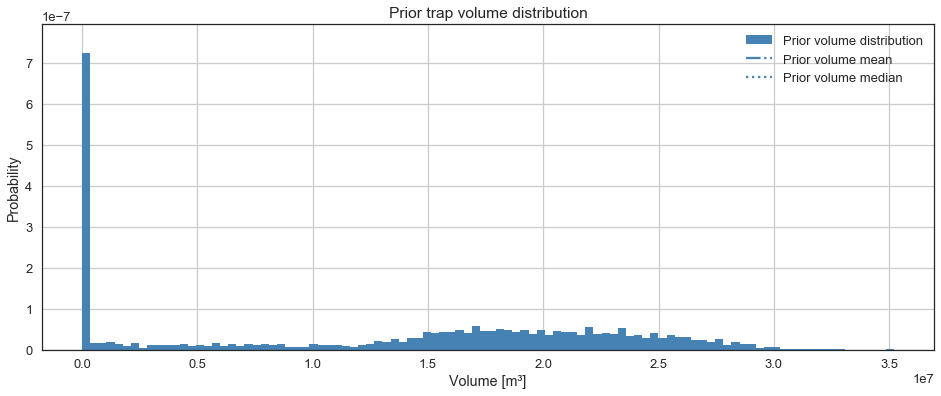

In [11]:
figsize(16, 6)

# Possibly mask away complete failures:
#volumes = max_volume_trace
#mask = volumes == 0
#masked_trace = volumes[~mask]

_hist1 = plt.hist(vol_trace, bins=100, normed=True, 
                  histtype="stepfilled",label="Prior volume distribution", color = "steelblue")
plt.vlines(vol_trace.mean(), 0, 1.1 * np.max(_hist1[0]), label="Prior volume mean", linestyles="-.", color = "steelblue")
plt.vlines(np.median(vol_trace), 0, 1.1 * np.max(_hist1[0]), label="Prior volume median", linestyles=":", color = "steelblue")
plt.title("Prior trap volume distribution")
plt.legend(loc="upper right")
#plt.xticks(np.arange(0, np.max(_hist1[0])+1, np.max(_hist1[0])/10))
plt.grid()
plt.ylim(0, 1.1 * np.max(_hist1[0]))
plt.xlabel("Volume [m³]")
plt.ylabel("Probability");

Bayes action (minimum) at risk r 0.50: 22784000.00 --- expected loss: 5380782.45
Bayes action (minimum) at risk r 0.75: 20096000.00 --- expected loss: 6658861.07
Bayes action (minimum) at risk r 1.00: 18432000.00 --- expected loss: 7551644.80
Bayes action (minimum) at risk r 1.25: 16960000.00 --- expected loss: 8278631.71
Bayes action (minimum) at risk r 1.50: 15680000.00 --- expected loss: 8857405.68


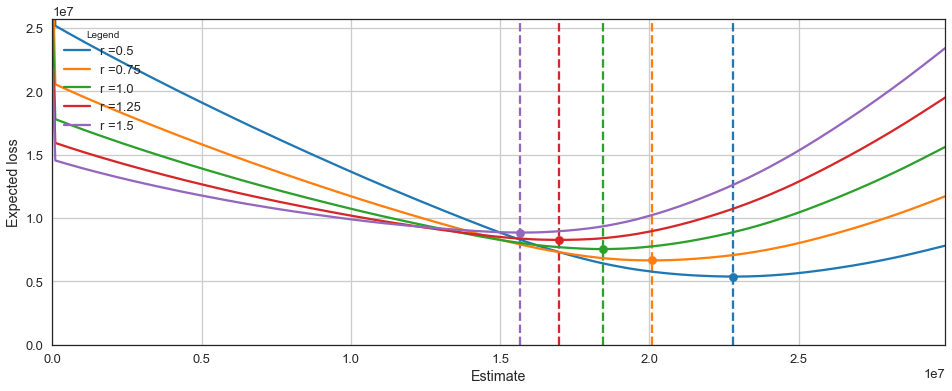

In [12]:
dm.expected_loss_plot(np.arange(0,30000000,100000), M3, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)

In [13]:
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


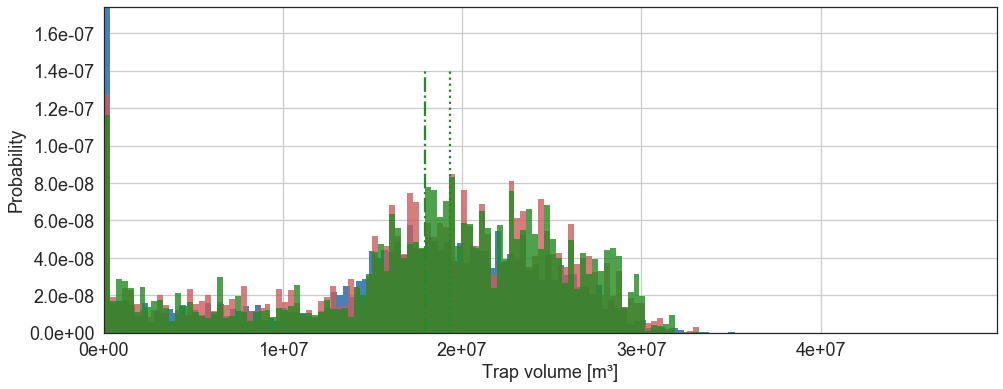

In [14]:
# ROV DISTRIBUTIONS (PRIOR AND POSTERIOR)
figsize(16, 6)
fig = plt.figure()
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize': 'medium'})
plt.rcParams.update({'axes.titlesize': 'medium'})
plt.rcParams.update({'legend.fontsize': 'medium'})

ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

bins = 100

_hist1 = ax.hist(M1, bins=bins, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

_hist2 = ax.hist(M2, bins=bins, normed=True, histtype="stepfilled",label="posterior distribution", color = "indianred", alpha = 0.8)

_hist3 = ax.hist(M3, bins=bins, normed=True, histtype="stepfilled",label="posterior distribution", color = "forestgreen", alpha = 0.8)

ax.vlines(M1.mean(), 0, 1.1 * np.max(_hist2[0]), label="prior score mean", linestyles="-.", color = "steelblue")
ax.vlines(np.median(M1), 0, 1.1 * np.max(_hist2[0]), label="prior score median", linestyles=":", color = "steelblue")

ax.vlines(M2.mean(), 0, 1.1 * np.max(_hist2[0]), label="post score mean", linestyles="-.", color = "indianred")
ax.vlines(np.median(M2), 0, 1.1 * np.max(_hist2[0]), label="post score median", linestyles=":", color = "indianred")

ax.vlines(M3.mean(), 0, 1.1 * np.max(_hist2[0]), label="post score mean", linestyles="-.", color = "forestgreen")
ax.vlines(np.median(M3), 0, 1.1 * np.max(_hist2[0]), label="post score median", linestyles=":", color = "forestgreen")

#ax.set_title("(A) - Prior and posterior ROV distribution")
#ax.legend(loc="upper right");
ax.grid()
ax.set_ylim(0,1.5 * np.max(_hist3[0]))
ax.set_xlim(0,1.5 * np.max(_hist3[1]) )
ax.set_xlabel("Trap volume [m³]")
ax.set_ylabel("Probability")

plt.show()

Bayes action (minimum) at risk r 0.50: 19072000.00 --- expected loss: 8582112.55
Bayes action (minimum) at risk r 0.75: 15616000.00 --- expected loss: 10785632.54
Bayes action (minimum) at risk r 1.00: 8960000.00 --- expected loss: 12100484.80
Bayes action (minimum) at risk r 1.25: 1280000.00 --- expected loss: 11759772.46
Bayes action (minimum) at risk r 1.50: 0.00 --- expected loss: 10763671.94


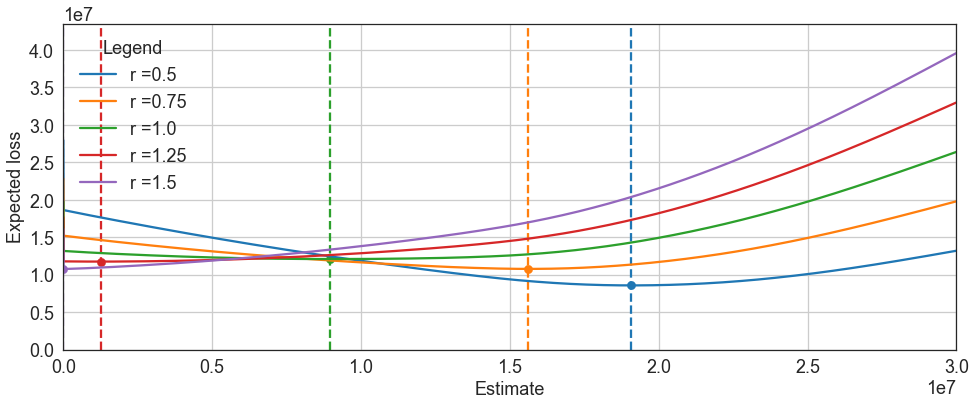

Bayes action (minimum) at risk r 0.50: 22528000.00 --- expected loss: 5387582.96
Bayes action (minimum) at risk r 0.75: 19712000.00 --- expected loss: 6654239.73
Bayes action (minimum) at risk r 1.00: 17920000.00 --- expected loss: 7544384.00
Bayes action (minimum) at risk r 1.25: 16448000.00 --- expected loss: 8220155.30
Bayes action (minimum) at risk r 1.50: 15232000.00 --- expected loss: 8776678.80


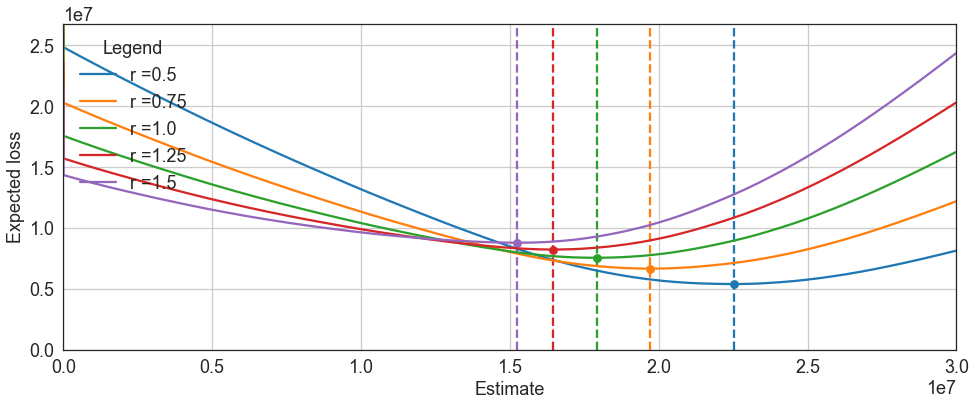

Bayes action (minimum) at risk r 0.50: 22784000.00 --- expected loss: 5380782.45
Bayes action (minimum) at risk r 0.75: 20096000.00 --- expected loss: 6658861.07
Bayes action (minimum) at risk r 1.00: 18432000.00 --- expected loss: 7551644.80
Bayes action (minimum) at risk r 1.25: 16960000.00 --- expected loss: 8278631.71
Bayes action (minimum) at risk r 1.50: 15680000.00 --- expected loss: 8857405.68


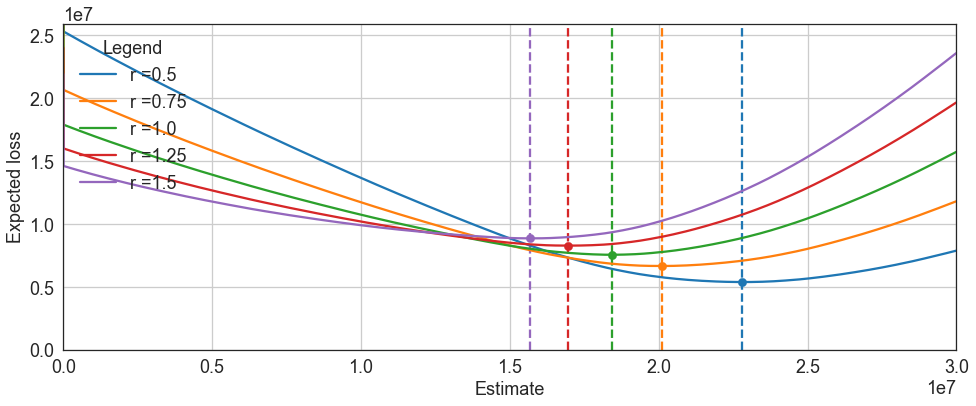

In [15]:
dm.expected_loss_plot(np.arange(0,30000000,10000), M1, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)
dm.expected_loss_plot(np.arange(0,30000000,10000), M2, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)
dm.expected_loss_plot(np.arange(0,30000000,10000), M3, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)
#dm.expected_loss_plot(np.arange(0,30000000,10000), vol_s4b, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)

In [16]:
np.nanmedian(M1)

16000000.0

C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


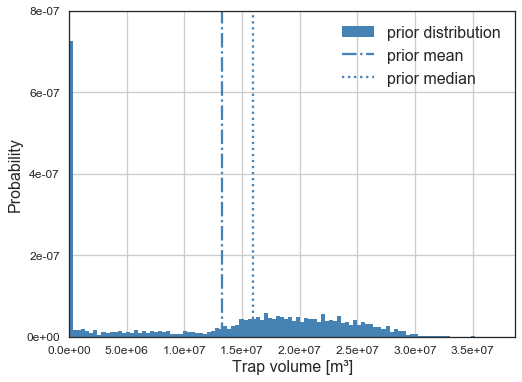

In [17]:
figsize(8, 6)
fig = plt.figure()
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 'medium'})
plt.rcParams.update({'axes.titlesize': 'medium'})
plt.rcParams.update({'legend.fontsize': 'medium'})

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=4)

ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

_hist1 = ax.hist(M1, bins=100, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

#_hist2 = ax.hist(recoverable_reserves_L, bins=100, normed=True, histtype="stepfilled",label="posterior distribution", color = "indianred", alpha = 0.8)

ax.vlines(np.nanmean(M1), 0, 0.0000008, label="prior mean", linestyles="-.", color = "steelblue")
ax.vlines(np.nanmedian(M1), 0,0.0000008, label="prior median", linestyles=":", color = "steelblue")

#ax.vlines(recoverable_reserves_L.mean(), 0, 0.0000035, label="post score mean", linestyles="-.", color = "indianred")
#ax.vlines(np.median(recoverable_reserves_L), 0, 0.0000035, label="post score median", linestyles=":", color = "indianred")

#ax.set_title("(A) - Prior and posterior ROV distribution")
ax.legend(loc="upper right");
ax.grid()
ax.set_ylim(0,0.0000008)
ax.set_xlim(0, 1.1 * np.max(_hist1[1]))
ax.set_xlabel("Trap volume [m³]")
ax.set_ylabel("Probability")
plt.show()

#dm.expected_loss_plot(np.arange(0,35000000,10000), M1, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)


In [18]:
# weight factors
ov = 1.25
ov_b = 2
uv_b = 1.5

# risk factor range
risks_s = np.arange(0.5, 1.6, 0.25)

# cutom loss fucntion including risk factors
def volume_lossR(estimate_s, true_s, risk_s):
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s == 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s == 0)
        loss_s[underest] = (true_s[underest] - estimate_s)*(risk_s**-0.5)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
        loss_s[overest_bad] = np.abs((true_s[overest_bad]-estimate_s))*(ov_b*risk_s)
        return loss_s

C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Fabian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Bayes action (minimum) at risk r 0.50: 19072000.00 --- expected loss: 8582112.55
Bayes action (minimum) at risk r 0.75: 15616000.00 --- expected loss: 10785632.54
Bayes action (minimum) at risk r 1.00: 8960000.00 --- expected loss: 12100484.80
Bayes action (minimum) at risk r 1.25: 1280000.00 --- expected loss: 11759772.46
Bayes action (minimum) at risk r 1.50: 0.00 --- expected loss: 10763671.94
Bayes action (minimum) at risk r 0.50: 22528000.00 --- expected loss: 5387582.96
Bayes action (minimum) at risk r 0.75: 19712000.00 --- expected loss: 6654239.73
Bayes action (minimum) at risk r 1.00: 17920000.00 --- expected loss: 7544384.00
Bayes action (minimum) at risk r 1.25: 16448000.00 --- expected loss: 8220155.30
Bayes action (minimum) at risk r 1.50: 15232000.00 --- expected loss: 8776678.80


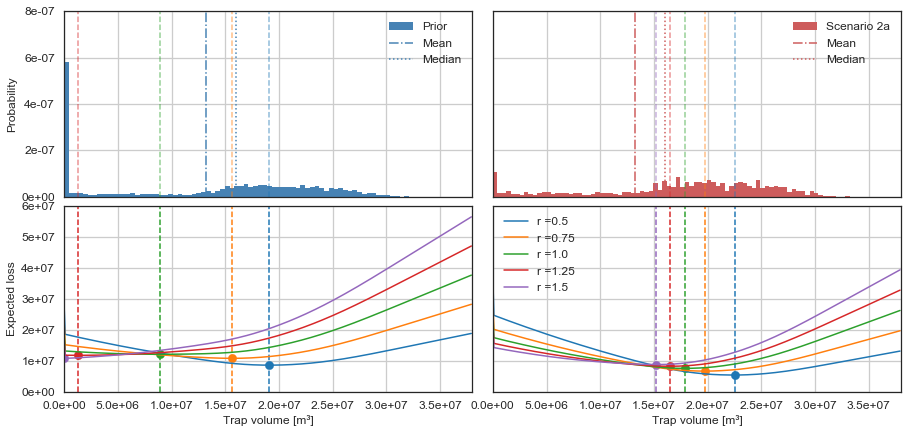

In [87]:
figsize(15, 7)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row')

vol_x_max = 38000000
nbins = 80
estimates_s = np.arange(0,vol_x_max, 100000)
risks_s = np.arange(0.5,1.75, 0.25)
lw = 1.5
alph = 0.5
m1_name = 'Prior'
m2_name = 'Scenario 2a' 


plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.labelsize': 'medium'})
plt.rcParams.update({'axes.titlesize': 'medium'})
plt.rcParams.update({'legend.fontsize': 'medium'})

plt.locator_params(axis='x', nbins=10)

### M1 distribution
ax[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax[0,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax[0,0].locator_params(axis='y', nbins=4)

_hist1 = ax[0,0].hist(M1, bins=nbins, normed=True, histtype="stepfilled",label=m1_name, color = "steelblue")

#_hist2 = ax.hist(recoverable_reserves_L, bins=100, normed=True, histtype="stepfilled",label="posterior distribution", color = "indianred", alpha = 0.8)

ax[0,0].vlines(np.nanmean(M1), 0, 0.0000008, label="Mean", linestyles="-.", color = "steelblue", linewidth=lw)
ax[0,0].vlines(np.nanmedian(M1), 0,0.0000008, label="Median", linestyles=":", color = "steelblue", linewidth=lw)
#ax[0,0].legend(loc="upper right");
ax[0,0].grid()
ax[0,0].set_ylim(0,0.0000008)
ax[0,0].set_xlim(0, vol_x_max)
#ax[0,0].set_xlabel("Trap volume [m³]")
ax[0,0].set_ylabel("Probability")

### M2 distribution
ax[0,1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax[0,1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax[0,1].locator_params(axis='y', nbins=4)
#_hist1 = ax[0,0].hist(M1, bins=100, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

_hist2 = ax[0,1].hist(M2, bins=nbins, normed=True, histtype="stepfilled",label=m2_name, color = "indianred")

ax[0,1].vlines(np.nanmean(M1), 0, 0.0000008, label="Mean", linestyles="-.", color = "indianred", linewidth=lw)
ax[0,1].vlines(np.nanmedian(M1), 0,0.0000008, label="Median", linestyles=":", color = "indianred", linewidth=lw)
#ax[0,1].legend(loc="upper right");
ax[0,1].grid()
ax[0,1].set_ylim(0,0.0000008)
ax[0,1].set_xlim(0, vol_x_max)
#ax[0,0].set_xlabel("Trap volume [m³]")
#ax[0,1].set_ylabel("Probability")

### M1 LF
ax[1,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax[1,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax[1,0].locator_params(axis='y', nbins=6)

expected_loss_s = lambda estimate_s, risk_s: volume_lossR(estimate_s, M1, risk_s).mean()

for r in risks_s:
    _color = next(ax[1,0]._get_lines.prop_cycler)
    loss = [expected_loss_s(e, r) for e in estimates_s]
    _min_vol = sop.fmin(expected_loss_s, -40, args=(r,),disp = False)
    if _min_vol < 0:
        _min_vol = 0
    ax[1,0].set_ylim(0,np.max(loss))
    ax[1,0].plot(estimates_s, loss, label = "r ="+str(r), color=_color['color'], linewidth=lw)
    ax[1,0].scatter(_min_vol, expected_loss_s(_min_vol,r), s = 70, color=_color['color'])#, label = "Bayes action r "+str(r))
    ax[1,0].vlines(_min_vol, 0, 60000000, color=_color['color'], linestyles="--", linewidth=lw)
    ax[0,0].vlines(_min_vol, 0, 0.0000008, color=_color['color'], linestyles="--", alpha=alph, linewidth=lw)
    print("Bayes action (minimum) at risk r %.2f: %.2f --- expected loss: %.2f" % (r, _min_vol,\
                                                                              expected_loss_s(_min_vol,r)))
#ax[1,0].legend(loc="upper left", scatterpoints=1, title="Legend")
#plt.vlines(0, 0, 1.1 * np.max(loss), label="zero score", linestyles="-")
#plt.vlines(res_score.mean(), 0, 1.1 * np.max(loss), label="posterior's mean", linestyles="-.")
#plt.vlines(np.median(res_score), 0, 1.1 * np.max(loss), label="score median", linestyles="-")
ax[1,0].set_xlabel("Trap volume [m³]")
ax[1,0].set_ylabel("Expected loss")
#ax[1,0].set_xlim(estimates_s[0], estimates_s[-1])
ax[1,0].set_ylim(0,60000000)
ax[1,0].grid()

### M2 LF
ax[1,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax[1,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax[1,0].locator_params(axis='y', nbins=6)

expected_loss_s = lambda estimate_s, risk_s: volume_lossR(estimate_s, M2, risk_s).mean()

for r in risks_s:
    _color = next(ax[1,1]._get_lines.prop_cycler)
    loss = [expected_loss_s(e, r) for e in estimates_s]
    _min_vol = sop.fmin(expected_loss_s, -40, args=(r,),disp = False)
    if _min_vol < 0:
        _min_vol = 0
    ax[1,1].set_ylim(0,np.max(loss))
    ax[1,1].plot(estimates_s, loss, label = "r ="+str(r), color=_color['color'], linewidth=lw)
    ax[1,1].scatter(_min_vol, expected_loss_s(_min_vol,r), s = 70, color=_color['color'])#, label = "Bayes action r "+str(r))
    ax[1,1].vlines(_min_vol, 0, 60000000, color=_color['color'], linestyles="--", linewidth=lw)
    ax[0,1].vlines(_min_vol, 0, 0.0000008, color=_color['color'], linestyles="--", alpha=alph, linewidth=lw)
    print("Bayes action (minimum) at risk r %.2f: %.2f --- expected loss: %.2f" % (r, _min_vol,\
                                                                              expected_loss_s(_min_vol,r)))
#ax[1,0].legend(loc="upper left", scatterpoints=1, title="Legend")
#plt.vlines(0, 0, 1.1 * np.max(loss), label="zero score", linestyles="-")
#plt.vlines(res_score.mean(), 0, 1.1 * np.max(loss), label="posterior's mean", linestyles="-.")
#plt.vlines(np.median(res_score), 0, 1.1 * np.max(loss), label="score median", linestyles="-")
ax[1,1].set_xlabel("Trap volume [m³]")
#ax[1,1].set_ylabel("Expected loss")
#ax[1,1].set_xlim(estimates_s[0], estimates_s[-1])
ax[1,1].set_ylim(0,60000000)
ax[1,1].grid()

#ax[0,0].minorticks_on()
#ax[0,0].grid(b=True, which='minor', linestyle=':')
#ax[0,1].minorticks_on()
#ax[0,1].grid(b=True, which='minor', linestyle=':')
#ax[1,0].minorticks_on()
#ax[1,0].grid(b=True, which='minor', linestyle=':')
#ax[1,1].minorticks_on()
#ax[1,1].grid(b=True, which='minor', linestyle=':')

#plt.grid(b=True, which='major', linestyle='-')

ax[0,0].legend(loc=1)
ax[0,1].legend(loc=1)
ax[1,1].legend()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
uniques, counts = np.unique(trap_control_trace, return_counts=True)
counts = np.round((counts/1000)*100)

labels = ('UNCLEAR', 'SPILL POINT', 'LEAK UNDER', 'LEAK OVER', 'STRAT')
trap_base = dict(zip(labels, [0,0,0,0,0]))
trap_controls = dict(zip(labels, counts))

In [ ]:
uniques

In [19]:
counts

array([  1., 165.,  80.,  39.,  29.])

In [39]:
ssf_trace

array([3.25      , 3.25      , 3.25      , 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333

In [41]:
vol_trace

array([       0.,        0.,        0.,  5952000.,  5952000.,  5952000.,
       10560000.,  9472000.,  9472000.,  9472000.,  9472000.,  9472000.,
        9472000.,  8192000.,  8192000., 10368000., 10368000., 10368000.,
       10368000., 10368000.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0., 14336000., 14336000., 14336000., 14272000.,
       14272000., 14272000., 14272000., 14272000., 14272000., 14336000.,
       14272000., 14272000., 17792000., 17792000., 17792000., 13952000.,
       13952000., 14144000., 14080000., 12864000., 12864000., 12864000.,
       12864000., 12864000., 12864000., 12864000., 

In [42]:
trap_control_trace

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 3., 3., 3., 3., 1., 1., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 3., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [55]:
post.db.thicknesses[:,2][-1]

array([306.75703666])

In [57]:
ssf_trace[-1]

4.75

In [59]:
post.db.trace_names

[['Base_Top_stoch',
  'Metropolis_Base_Top_stoch_adaptive_scale_factor',
  'Metropolis_Res_Top_stoch_adaptive_scale_factor',
  'Metropolis_SSF_likelihood_adaptive_scale_factor',
  'Metropolis_Seal_Top_stoch_adaptive_scale_factor',
  'Metropolis_SecRes_Top_stoch_adaptive_scale_factor',
  'Metropolis_hanging walloffset_unc_adaptive_scale_factor',
  'Metropolis_res_th_likelihood_adaptive_scale_factor',
  'Metropolis_seal_th_likelihood_adaptive_scale_factor',
  'Metropolis_sec_res_th_likelihood_adaptive_scale_factor',
  'Res_Top_stoch',
  'Seal_Top_stoch',
  'SecRes_Top_stoch',
  'deviance',
  'hanging walloffset_unc',
  'thicknesses',
  'trap_analysis',
  'input_data',
  'lith_prob']]

In [73]:
post.db.trace('hanging walloffset_unc')[-1]

-287.52754763253364